<a href="https://colab.research.google.com/github/PreethiAngelStephen01/NLP/blob/main/NLP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("/content/depression_dataset_reddit_cleaned.csv")
print(data.head())

                                          clean_text  is_depression
0  we understand that most people who reply immed...              1
1  welcome to r depression s check in post a plac...              1
2  anyone else instead of sleeping more when depr...              1
3  i ve kind of stuffed around a lot in my life d...              1
4  sleep is my greatest and most comforting escap...              1


In [ ]:
print(data.tail())

                                             clean_text  is_depression
7726                                       is that snow              0
7727                 moulin rouge mad me cry once again              0
7728  trying to shout but can t find people on the list              0
7729  ughh can t find my red sox hat got ta wear thi...              0
7730  slept wonderfully finally tried swatching for ...              0


In [ ]:
print(data.isnull().sum())

clean_text       0
is_depression    0
dtype: int64


In [ ]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["clean_text"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
print(str(text).lower())

understand peopl repli immedi op invit talk privat mean help type respons usual lead either disappoint disast usual work quit differ say pm anytim casual social context huge admir appreci goodwil good citizenship mani support other flag inappropri content even know mani struggl hard work behind scene inform resourc make easier give get qualiti help small start new wiki page explain detail much better respond public comment least gotten know someon maintain r depress wiki privat contact full text current version summari anyon act helper invit accept privat contact e pm chat kind offsit communic earli convers show either bad intent bad judgement either way unwis trust pm anytim seem like kind generous offer might perfect well mean unless solid rapport ha establish wise idea point consid offer accept invit communic privat post support repli public help peopl op respons good qualiti educ inspir helper   rule http en wikipedia org wiki rule internet cultur appli much doe anywher els interne

In [ ]:
print([word for word in text.split(' ') if word not in stopword])

['understand', 'peopl', 'repli', 'immedi', 'op', 'invit', 'talk', 'privat', 'mean', 'help', 'type', 'respons', 'usual', 'lead', 'either', 'disappoint', 'disast', 'usual', 'work', 'quit', 'differ', 'say', 'pm', 'anytim', 'casual', 'social', 'context', 'huge', 'admir', 'appreci', 'goodwil', 'good', 'citizenship', 'mani', 'support', 'flag', 'inappropri', 'content', 'even', 'know', 'mani', 'struggl', 'hard', 'work', 'behind', 'scene', 'inform', 'resourc', 'make', 'easier', 'give', 'get', 'qualiti', 'help', 'small', 'start', 'new', 'wiki', 'page', 'explain', 'detail', 'much', 'better', 'respond', 'public', 'comment', 'least', 'gotten', 'know', 'someon', 'maintain', 'r', 'depress', 'wiki', 'privat', 'contact', 'full', 'text', 'current', 'version', 'summari', 'anyon', 'act', 'helper', 'invit', 'accept', 'privat', 'contact', 'e', 'pm', 'chat', 'kind', 'offsit', 'communic', 'earli', 'convers', 'show', 'either', 'bad', 'intent', 'bad', 'judgement', 'either', 'way', 'unwis', 'trust', 'pm', 'anyti

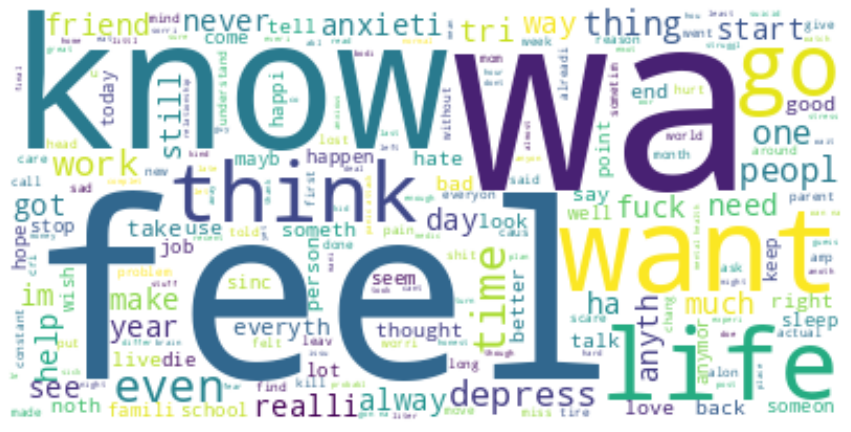

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

x = np.array(data["clean_text"])
y = np.array(data["is_depression"])

cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y,
                                                test_size=0.25,
                                                random_state=0)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(xtrain, ytrain)

BernoulliNB()

In [ ]:
y_pred = model.predict(xtest)

y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytest, y_pred)

cm


array([[974,   0],
       [308, 651]])

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score,classification_report, accuracy_score
ran_for_pre=precision_score(ytest, y_pred)
ran_for_rec=recall_score(ytest, y_pred)
ran_for_f1=f1_score(ytest, y_pred)
ran_for_clas=classification_report(ytest, y_pred)
ran_for_acc=accuracy_score(ytest, y_pred)
print('precision: ',ran_for_pre)
print('recall: ',ran_for_rec)
print('f1: ',ran_for_f1)
print('classification: ',ran_for_clas)
print('accuracy: ',ran_for_acc)

precision:  1.0
recall:  0.6788321167883211
f1:  0.808695652173913
classification:                precision    recall  f1-score   support

           0       0.76      1.00      0.86       974
           1       1.00      0.68      0.81       959

    accuracy                           0.84      1933
   macro avg       0.88      0.84      0.84      1933
weighted avg       0.88      0.84      0.84      1933

accuracy:  0.8406621831350233


In [ ]:
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)